# Importation des bibliothèques nécessaires


In [1]:
import os
import pandas as pd                         # Pour manipuler des données sous forme de DataFrame
import random                               # Pour générer des nombres aléatoires
import matplotlib.pyplot as plt             # Pour tracer des graphiques
import numpy as np                          # Pour le calcul numérique
import seaborn as sns

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)  # Pour le formatage des axes

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Métrique pour évaluer la performance

import tensorflow as tf                     # Pour le framework TensorFlow
from tensorflow.keras import layers         # Importation des couches de réseau neuronal de Keras
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten  # Importation de couches spécifiques
from tensorflow.keras.utils import to_categorical  # Pour convertir les étiquettes en catégories
from tensorflow.keras.models import Sequential    # Pour définir des modèles séquentiels
from tensorflow.keras.optimizers import Adam, SGD  # Optimiseurs pour l'entraînement
from tensorflow.keras.callbacks import EarlyStopping  # Callback pour l'arrêt anticipé

2024-08-09 14:58:26.336969: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-09 14:58:27.366364: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Chargement des datasets

In [2]:
#from google.colab import drive
#drive.mount('/gdrive')

In [3]:
#cd /gdrive/My Drive/DataSet/MLP

In [4]:
#features_df = pd.read_csv("/gdrive/My Drive/DataSet/MLP/data_voyelle.csv")
#targets_df = pd.read_csv("/gdrive/My Drive/DataSet/MLP/label_voyelle.csv")
features_df = pd.read_csv("data_voyelle.csv")
targets_df = pd.read_csv("label_voyelle.csv")

# Visualisation

#### Afficher les tailles des DataFrames

In [5]:
print(f"Taille des features : {features_df.shape}")
print(f"Taille des targets : {targets_df.shape}")

Taille des features : (6303, 16384)
Taille des targets : (6303, 1)


#### Visualiser les 5 premières et les 5 dernières lignes des features

In [6]:
features_df.head(-10)

,0,1,2,3,4,5,6,7,8,9,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,117,116,117,118,118,119,121,120,118,119,...,124,122,124,124,122,123,124,124,123,125
1,155,159,163,167,164,163,164,164,163,164,...,160,161,161,160,160,159,159,162,162,162
2,174,170,168,167,169,170,169,167,166,169,...,172,171,169,167,167,168,171,171,171,171
3,157,157,154,154,153,149,147,151,147,145,...,172,173,170,169,174,171,167,167,167,168
4,167,167,168,167,167,167,167,167,167,167,...,180,180,180,180,180,179,179,180,180,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6288,158,157,158,158,159,160,159,156,158,157,...,154,150,145,141,138,133,131,125,118,113
6289,157,157,156,159,159,158,158,157,160,159,...,59,60,61,60,59,59,55,58,59,55
6290,158,156,156,157,157,155,155,157,158,158,...,40,43,45,46,43,42,45,43,42,43
6291,184,184,186,185,185,185,186,186,186,186,...,76,75,76,79,75,77,85,87,91,93


#### Visualiser les 5 premières et les 5 dernières lignes des targets

In [7]:
targets_df.head(-10)

,0
0,a
1,a
2,a
3,a
4,a
...,...
6288,u
6289,u
6290,u
6291,u


#### Renommer la colonne 0 de target_df en Label

In [8]:
targets_df.columns = ['Label']

#### Visualiser les tailles de données par classes

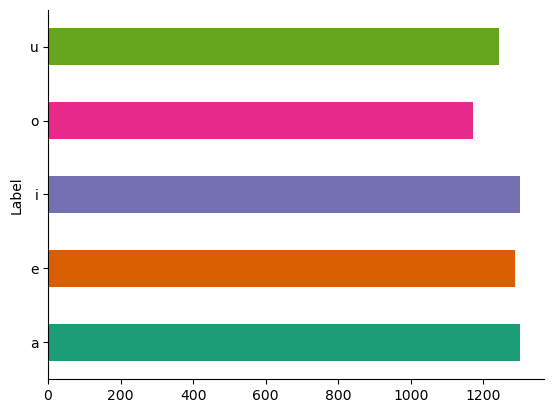

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns
targets_df.groupby('Label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# plt.hist(targets_df)

# Prétraitements de données
#### Vérifier que les dimensions sont compatibles

In [10]:
assert len(features_df) == len(targets_df), "Les datasets doivent avoir la même longueur"

#### Concaténer les deux DataFrames en ajoutant la colonne target à la fin des features

In [11]:
merged_df = pd.concat([features_df, targets_df], axis=1)

#### Optionel : Sauvegarder le DataFrame résultant dans un nouveau fichier CSV

In [12]:
#merged_df.to_csv('merged_features_targets.csv', index=False)

#### Optionel : Chargement du dataframe résultant des deux premiers ( features.csv et targets.csv)

In [13]:
#merged_df = pd.read_csv("merged_features_targets.csv")

####  Afficher le DataFrame résultant

In [14]:
merged_df.head(-10)

,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,Label
0,117,116,117,118,118,119,121,120,118,119,...,122,124,124,122,123,124,124,123,125,a
1,155,159,163,167,164,163,164,164,163,164,...,161,161,160,160,159,159,162,162,162,a
2,174,170,168,167,169,170,169,167,166,169,...,171,169,167,167,168,171,171,171,171,a
3,157,157,154,154,153,149,147,151,147,145,...,173,170,169,174,171,167,167,167,168,a
4,167,167,168,167,167,167,167,167,167,167,...,180,180,180,180,179,179,180,180,180,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6288,158,157,158,158,159,160,159,156,158,157,...,150,145,141,138,133,131,125,118,113,u
6289,157,157,156,159,159,158,158,157,160,159,...,60,61,60,59,59,55,58,59,55,u
6290,158,156,156,157,157,155,155,157,158,158,...,43,45,46,43,42,45,43,42,43,u
6291,184,184,186,185,185,185,186,186,186,186,...,75,76,79,75,77,85,87,91,93,u


### Division du dataset et Encodage des targets
#### Diviser les features (toutes les colonnes sauf la dernière) et les targets (dernière colonne)

In [15]:
X = merged_df.iloc[:, :-1]  # Features
y = merged_df.iloc[:, -1]   # Targets

# Préparer les données
X = X.values.reshape(-1, 128, 128, 1)  # Reshape pour correspondre au format des images 128x128 en niveaux de gris
y = y.values.flatten()  # Flatten pour avoir un vecteur 1D

#### Encoder les labels catégoriels en one-hot encoding

In [16]:
label_encoder = LabelEncoder()                                          # Création d'un encodeur de labels
y_encoded_integer = label_encoder.fit_transform(y)       # Conversion des labels en entiers
y_encoded_categorical = to_categorical(y_encoded_integer)               # Encodage one-hot des labels

#### Diviser en ensembles d'entraînement et de test (80% train, 20% test)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y_encoded_categorical,
                                                    test_size=0.2,
                                                    random_state=42)

#### Afficher les tailles des ensembles créés

In [18]:
print(f"Taille des features d'entraînement : {X_train.shape}")
print(f"Taille des features de test : {X_test.shape}")
print(f"Taille des targets d'entraînement : {y_train.shape}")
print(f"Taille des targets de test : {y_test.shape}")

Taille des features d'entraînement : (5042, 128, 128, 1)
Taille des features de test : (1261, 128, 128, 1)
Taille des targets d'entraînement : (5042, 5)
Taille des targets de test : (1261, 5)


### Visualisation des exemples aléatoires de l'ensemble d'entraînement

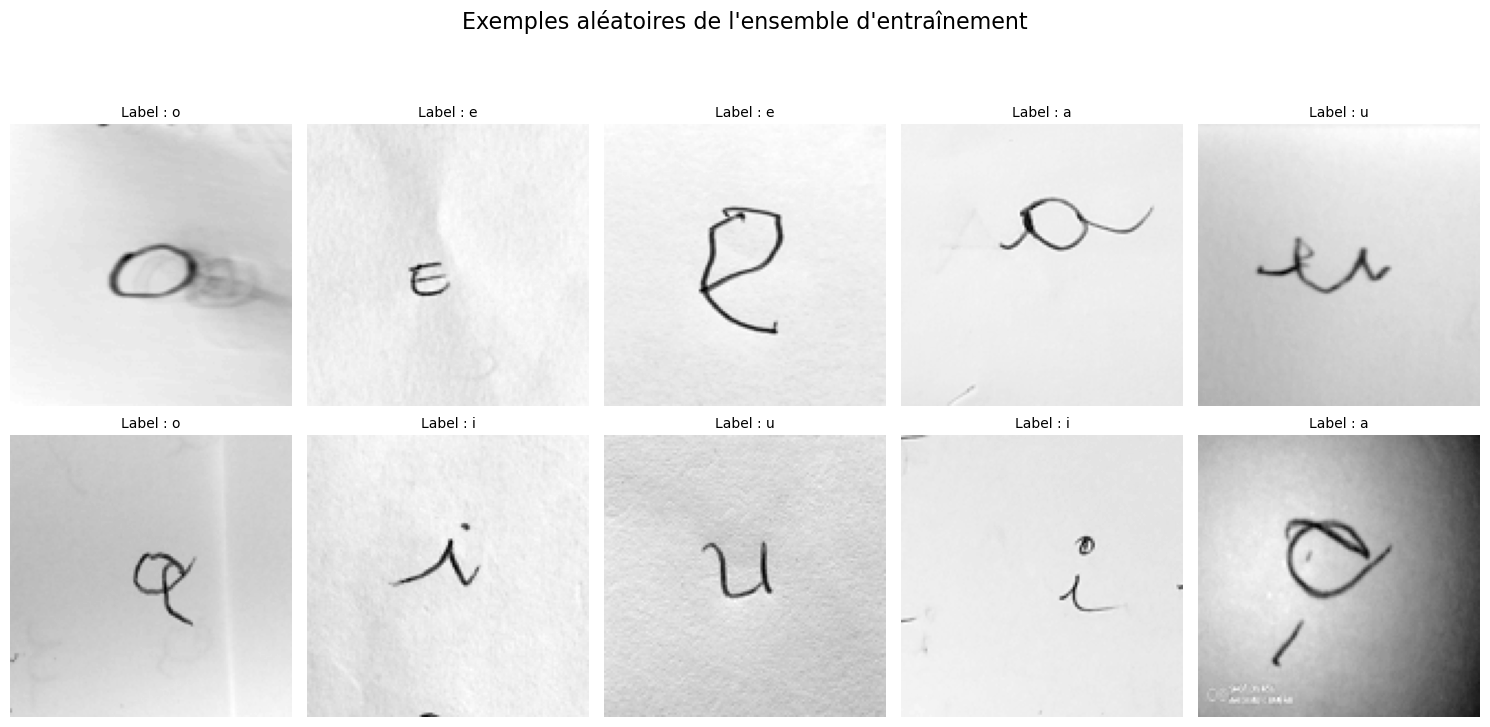

In [19]:
# Définir une graine aléatoire pour garantir la reproductibilité
SEED_VALUE = 52
np.random.seed(SEED_VALUE)

# Générer 10 indices aléatoires à partir de X_train
random_indices = np.random.choice(len(X_train), size=10, replace=False)

# Sélectionner les features et les étiquettes correspondantes
sampled_X = X_train[random_indices]
sampled_y = y_train[random_indices]

# Décoder les labels en one-hot vers les labels originaux
sampled_y_indices = np.argmax(sampled_y, axis=1)  # Convertir de l'encodage one-hot à un tableau d'indices
sampled_labels_original = label_encoder.inverse_transform(sampled_y_indices)

# Afficher les exemples
fig, axes = plt.subplots(2, 5, figsize=(15, 8))
fig.suptitle('Exemples aléatoires de l\'ensemble d\'entraînement', fontsize=16)

for i in range(len(sampled_X)):
    try:
        # Transformer en matrice 2D (128x128)
        image_data = sampled_X[i].reshape(128, 128)
        ax = axes[i // 5, i % 5]  # Sélectionner l'axe correspondant dans la grille 2x5
        ax.imshow(image_data, cmap='gray')  # Afficher l'image en niveaux de gris
        ax.set_title(f'Label : {sampled_labels_original[i]}', fontsize=10)  # Ajouter l'étiquette comme titre
        ax.axis('off')  # Masquer les axes
    except ValueError as e:
        print(f"Erreur lors de la transformation de l'image avec l'index {random_indices[i]}: {e}")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajuster pour ne pas recouvrir le titre
plt.show()


#### Normaliser les features

In [20]:
# Normalisation z-score des données
scaler = StandardScaler()
X_train = X_train.reshape(-1, 128*128)  # Reshape pour standardiser
X_test = X_test.reshape(-1, 128*128)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = X_train.reshape(-1, 128, 128, 1)  # Reshape pour le modèle
X_test = X_test.reshape(-1, 128, 128, 1)

# Construction du modèle de PMC
#### Construire le modèle MLP

In [21]:
# Définir un modèle séquentiel
model = Sequential()

# Ajouter des couches au modèle
model.add(Flatten(input_shape=(128, 128, 1)))  # Flatten layer to convert 2D array to 1D
model.add(Dense(256, activation='relu'))  # Couche cachée avec 256 neurones
model.add(Dense(128, activation='relu'))  # Deuxième couche cachée avec 128 neurones
model.add(Dense(64, activation='relu')) 
model.add(Dense(5, activation='softmax'))  # Couche de sortie avec autant de neurones que de classes

/home/narcisse/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### Compiler le modèle

In [22]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### Afficher le résumé du modèle

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     4,194,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,236,037 (16.16 MB)

 Trainable params: 4,236,037 (16.16 MB)

 Non-trainable params: 0 (0.00 B)

# Entrainement du modèle

In [24]:
# Définir l'arrêt anticipé
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Entraîner le modèle avec l'arrêt anticipé
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=100,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping]
                    )
# callbacks=[early_stopping]

Epoch 1/100


2024-08-09 14:59:08.273980: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 330432512 exceeds 10% of free system memory.


51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.2159 - loss: 8.3339 - val_accuracy: 0.2704 - val_loss: 5.5135
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.3072 - loss: 4.4656 - val_accuracy: 0.3196 - val_loss: 2.4300
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.3759 - loss: 2.3916 - val_accuracy: 0.3664 - val_loss: 2.0087
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.4298 - loss: 1.7156 - val_accuracy: 0.4314 - val_loss: 1.6357
Epoch 5/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.5001 - loss: 1.3805 - val_accuracy: 0.3997 - val_loss: 1.5771
Epoch 6/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.5141 - loss: 1.3571 - val_accuracy: 0.4552 - val_loss: 1.4136
Epoch 7/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.5637 - loss: 1.1931 - val_accuracy: 0.4489 - val_loss: 1.6944
Epoch 8/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.5568 - loss: 1.3294 - val_accuracy: 0.4179 - val_l

# Évaluation du Modèle PMC
#### Évaluer le modèle

In [25]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.2f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5450 - loss: 1.3295
Test Loss: 1.37
Test Accuracy: 54.32%


#### Prédictions sur l'ensemble de test

In [26]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


#### Vérification des valeurs uniques et du mapping des labels

In [27]:
print(f"Valeurs uniques dans y_true:", np.unique(y_true))
print("Valeurs uniques dans in y_pred_classes:", np.unique(y_pred_classes))
print("Mapping des labels:", label_encoder.classes_)

Valeurs uniques dans y_true: [0 1 2 3 4]
Valeurs uniques dans in y_pred_classes: [0 1 2 3 4]
Mapping des labels: ['a' 'e' 'i' 'o' 'u']


#### Rapport de classification

In [28]:
report = classification_report(y_true,
                               y_pred_classes,
                               target_names=label_encoder.classes_)
print(report)

              precision    recall  f1-score   support

           a       0.63      0.51      0.56       278
           e       0.53      0.55      0.54       240
           i       0.62      0.49      0.55       263
           o       0.51      0.66      0.57       236
           u       0.47      0.52      0.49       244

    accuracy                           0.54      1261
   macro avg       0.55      0.55      0.54      1261
weighted avg       0.55      0.54      0.54      1261



#### Matrice de confusion

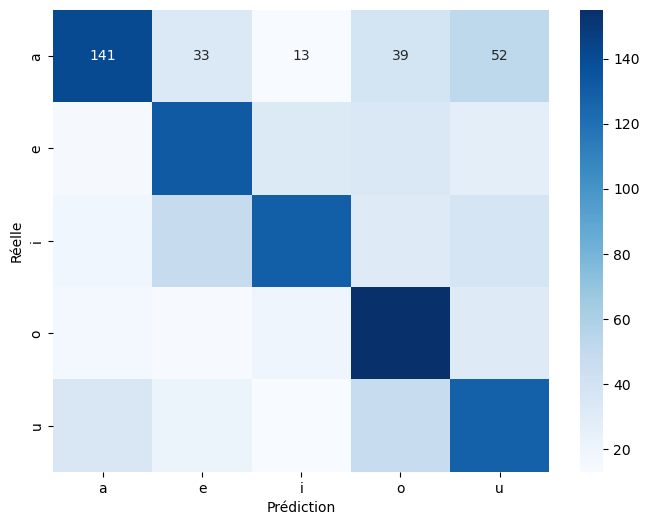

In [29]:
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix,
            annot=True,
            fmt="d",
            cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Prédiction")
plt.ylabel("Réelle")
#plt.title("Matrice de Confusion")
plt.show()

#### Courbes d'apprentissage

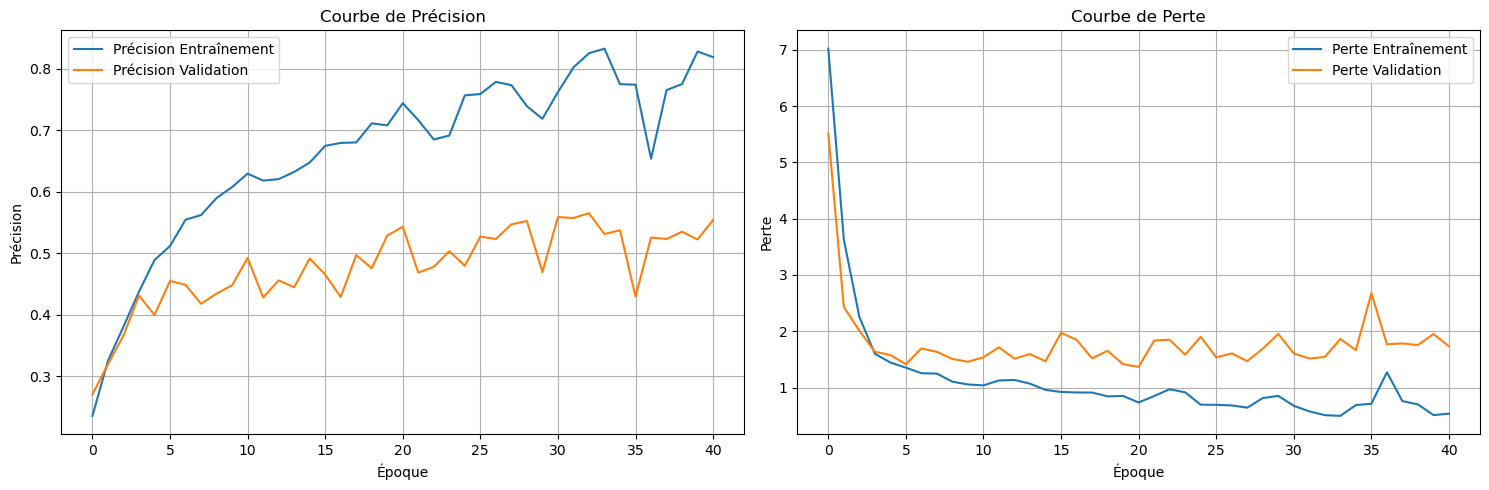

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(history.history['accuracy'], label='Précision Entraînement')
axs[0].plot(history.history['val_accuracy'], label='Précision Validation')
axs[0].set_title('Courbe de Précision')
axs[0].set_ylabel('Précision')
axs[0].set_xlabel('Époque')
axs[0].legend(loc='best')
axs[0].grid(True)

axs[1].plot(history.history['loss'], label='Perte Entraînement')
axs[1].plot(history.history['val_loss'], label='Perte Validation')
axs[1].set_title('Courbe de Perte')
axs[1].set_ylabel('Perte')
axs[1].set_xlabel('Époque')
axs[1].legend(loc='best')
axs[1].grid(True)

plt.tight_layout()
plt.show()

#### Visualiser 10 images aléatoirement prédictes

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


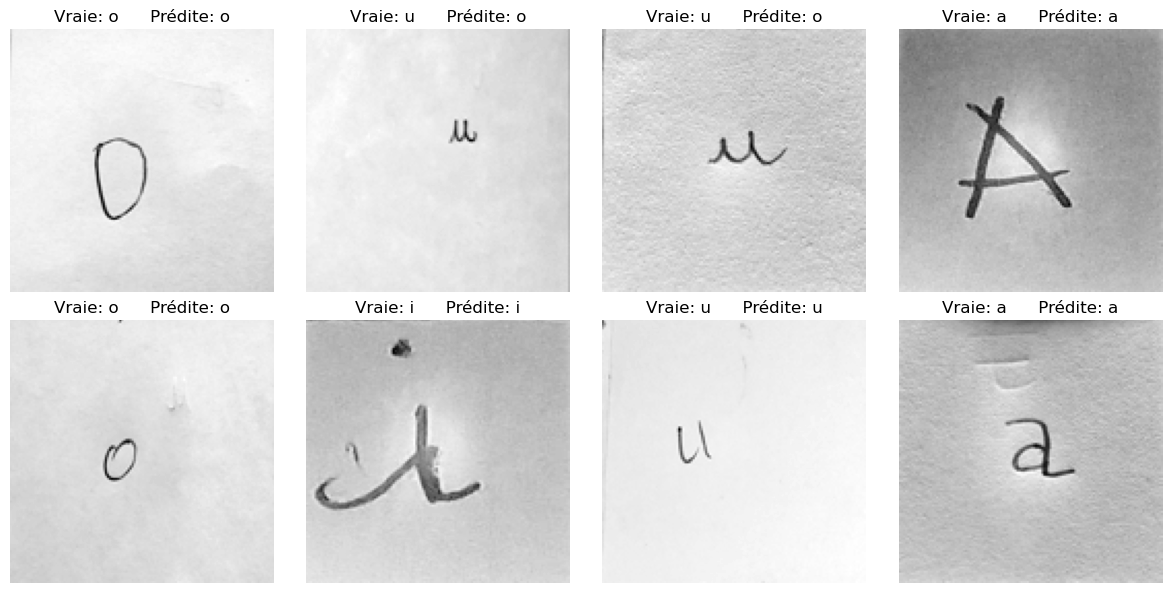

In [31]:
# Obtenir les prédictions du modèle sur l'ensemble de test
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Décoder les étiquettes en classes initiales
predicted_labels = label_encoder.inverse_transform(predicted_classes)
true_labels = label_encoder.inverse_transform(true_classes)

# Sélectionner un certain nombre d'exemples à visualiser
num_samples = 8
random_indices = np.random.choice(X_test.shape[0], num_samples, replace=False)
sample_features = X_test[random_indices]
sample_true_labels = true_labels[random_indices]
sample_predicted_labels = predicted_labels[random_indices]

# Spécifiez la hauteur et la largeur réelles de vos images
image_height = 128  # Hauteur réelle des images
image_width = 128   # Largeur réelle des images

# Afficher les features comme des images avec les vraies étiquettes et les étiquettes prédites
plt.figure(figsize=(12, 6))
for i in range(num_samples):
    plt.subplot(2, 4, i + 1)
    plt.imshow(sample_features[i].reshape(image_height, image_width), cmap='gray')
    plt.title(f"Vraie: {sample_true_labels[i]}      Prédite: {sample_predicted_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


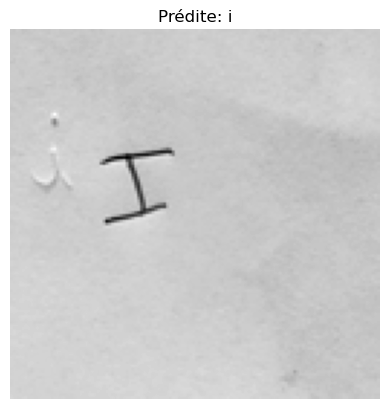

In [32]:
from PIL import Image
# Fonction pour charger et prétraiter une image
def preprocess_image(image_path):
    image = Image.open(image_path).convert('L')  # Convertir en niveaux de gris
    image = image.resize((128, 128))  # Redimensionner en 128x128
    image_array = np.array(image).reshape(1, 128, 128, 1)  # Reshape pour correspondre au modèle
    image_array = scaler.transform(image_array.reshape(1, -1)).reshape(1, 128, 128, 1)  # Standardiser
    return image_array

# Chemin de l'image à prédire
image_path = 'Image_test/20240527_094305.jpg'  # Remplacez par le chemin de votre image

# Prétraiter l'image
preprocessed_image = preprocess_image(image_path)

# Faire la prédiction
predicted_label = np.argmax(model.predict(preprocessed_image), axis=1)
predicted_label_name = label_encoder.inverse_transform(predicted_label)[0]

# Afficher l'image avec la prédiction
plt.imshow(preprocessed_image.reshape(128, 128), cmap='gray')
plt.title(f"Prédite: {predicted_label_name}")
plt.axis('off')
plt.show()